<a href="https://colab.research.google.com/github/farhan1503001/Image-Forgery-Detection/blob/main/Image_Forgery_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [3]:
import pandas as pd
x_dataset=[]
y_dataset=[]
dataset=pd.read_csv(filepath_or_buffer="/content/drive/My Drive/Filer.txt",delim_whitespace=True)

In [4]:
dataset


,00007tamp1.jpg,1
0,00007tamp10.jpg,1
1,00007tamp11.jpg,1
2,00007tamp12.jpg,1
3,00007tamp13.jpg,1
4,00007tamp14.jpg,1
...,...,...
1994,PC050594_scale.jpg,0
1995,PC190129_scale.jpg,0
1996,PC190130_scale.jpg,0
1997,PC190612_scale.jpg,0


In [5]:
path='/content/drive/My Drive/MICC-F2000/'

In [6]:
 i=0
 for index, row in dataset.iterrows():
    full_file_name=path+row[0]
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=np.array(row[1],dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [7]:
X_dataset=np.array(x_dataset)
Y_dataset=np.array(y_dataset)
Y_dataset=Y_dataset.reshape(1999,1)

In [8]:
from sklearn.model_selection import KFold
folds=list(KFold(n_splits=5,shuffle=True,random_state=1).split(X_dataset,Y_dataset))

In [37]:
Inception=tf.keras.applications.InceptionV3(include_top=False,input_shape=(224,224,3))
input_image=tf.keras.layers.Input((224,224,3))
x=Inception (input_image)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(2)(x)
out=tf.keras.layers.Activation(activation='softmax')(x)

model=tf.keras.Model(inputs=input_image,outputs=out)

model.compile(optimizer=tf.keras.optimizers.Adamax(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
History=[]
Prescore=[]
Recall=[]
F1=[]
Sensspeci=[]
Roc_auc=[]
for j,(train_idx,val_idx) in enumerate(folds):
    print("Fold "+str(j+1))
    
    x_train=X_dataset[train_idx]
    y_train=Y_dataset[train_idx]
    x_val=X_dataset[val_idx]
    y_val=Y_dataset[val_idx]
    history=model.fit(x_train,y_train,batch_size=32,epochs=8,validation_data=(x_val,y_val))
    y_predict=model.predict(x_val)
    Y_predict=np.argmax(y_predict,axis=1)
    l=len(y_val)
    Y_predict=np.reshape(Y_predict,(l,1))
    prescore=precision_score(y_val,Y_predict)
    recaller=recall_score(y_val,Y_predict)
    score=f1_score(y_val,Y_predict)
    sensitivity=sensitivity_specificity_support(y_val,Y_predict,average='binary')
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    History.append(history)
    Prescore.append(prescore)
    F1.append(score)
    Recall.append(recaller)
    Sensspeci.append(sensitivity)

Fold 1
Epoch 1/8
50/50 [==============================] - 9s 188ms/step - loss: 0.3207 - accuracy: 0.8899 - val_loss: 0.2793 - val_accuracy: 0.8800
Epoch 2/8
50/50 [==============================] - 8s 164ms/step - loss: 0.1355 - accuracy: 0.9681 - val_loss: 0.2823 - val_accuracy: 0.8775
Epoch 3/8
50/50 [==============================] - 8s 163ms/step - loss: 0.1127 - accuracy: 0.9700 - val_loss: 0.1722 - val_accuracy: 0.9550
Epoch 4/8
50/50 [==============================] - 8s 163ms/step - loss: 0.0964 - accuracy: 0.9762 - val_loss: 0.1962 - val_accuracy: 0.9525
Epoch 5/8
50/50 [==============================] - 8s 163ms/step - loss: 0.0817 - accuracy: 0.9762 - val_loss: 0.2203 - val_accuracy: 0.9700
Epoch 6/8
50/50 [==============================] - 8s 163ms/step - loss: 0.0765 - accuracy: 0.9794 - val_loss: 0.2362 - val_accuracy: 0.9675
Epoch 7/8
50/50 [==============================] - 8s 163ms/step - loss: 0.0790 - accuracy: 0.9781 - val_loss: 0.2388 - val_accuracy: 0.9675
Epoch 

In [39]:
val_acc=History[0].history['val_accuracy']
val_acc1=History[1].history['val_accuracy']
val_acc2=History[2].history['val_accuracy']
val_acc3=History[3].history['val_accuracy']
val_acc4=History[4].history['val_accuracy']
Accuracvalid1=val_acc[7]
Accuracyvalid2=val_acc1[7]
Accuracyvalid3=val_acc2[7]
Accuracyvalid4=val_acc3[7]
Accuracyvalid5=val_acc4[7]
Mean_valid_Accuracy=(Accuracvalid1+Accuracyvalid2+Accuracyvalid3+Accuracyvalid4+Accuracyvalid5)/5.00
print("validation Accuracy for Fold-1 ",Accuracvalid1)
print("validation Accuracy for Fold-2",Accuracyvalid2)
print("Validation Accuracy for Fold-3 ",Accuracyvalid3)
print("Validation Accuracy for Fold-4  ",Accuracyvalid4)
print("Validation Accuracy for Fold-5  ",Accuracyvalid5)
print("Mean Validation Accuracy ",Mean_valid_Accuracy)

validation Accuracy for Fold-1  0.9700000286102295
validation Accuracy for Fold-2 0.987500011920929
Validation Accuracy for Fold-3  0.9800000190734863
Validation Accuracy for Fold-4   0.9825000166893005
Validation Accuracy for Fold-5   0.9974937438964844
Mean Validation Accuracy  0.9834987640380859


In [40]:
print("Printing the recall scores and average of them")
avgr=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Recall[i])
  avgr=avgr+Recall[i]

print("Average precision-score ",avgr/5.00)

Printing the recall scores and average of them
Precision of Fold - 1 1.0
Precision of Fold - 2 0.9928057553956835
Precision of Fold - 3 1.0
Precision of Fold - 4 0.9858156028368794
Precision of Fold - 5 1.0
Average precision-score  0.9957242716465127


In [41]:
print("Printing the F-1 scores and average of them")
avgf=0.0
for i in range(5):
  print("Precision of Fold -",i+1,F1[i])
  avgf=avgf+F1[i]

print("Average f1-score ",avgf/5.00)

Printing the F-1 scores and average of them
Precision of Fold - 1 0.9600000000000001
Precision of Fold - 2 0.9822064056939502
Precision of Fold - 3 0.9724137931034482
Precision of Fold - 4 0.9754385964912281
Precision of Fold - 5 0.996282527881041
Average f1-score  0.9772682646339333


In [42]:
print("Printing the precision scores and average of them")
avg=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Prescore[i])
  avg=avg+Prescore[i]

print("Average precision-score ",avg/5.00)

Printing the precision scores and average of them
Precision of Fold - 1 0.9230769230769231
Precision of Fold - 2 0.971830985915493
Precision of Fold - 3 0.9463087248322147
Precision of Fold - 4 0.9652777777777778
Precision of Fold - 5 0.9925925925925926
Average precision-score  0.9598174008390001


In [43]:
print("Printing the sensitivity scores and average of them")
avgsen=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Sensspeci[i][0])
  avgsen=avgsen+Sensspeci[i][0]

print("Average sensitivity-score ",avgsen/5.00)

Printing the sensitivity scores and average of them
Precision of Fold - 1 1.0
Precision of Fold - 2 0.9928057553956835
Precision of Fold - 3 1.0
Precision of Fold - 4 0.9858156028368794
Precision of Fold - 5 1.0
Average sensitivity-score  0.9957242716465127


In [44]:
print("Printing the specificity scores and average of them")
avgsp=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Sensspeci[i][1])
  avgsp=avgsp+Sensspeci[i][1]

print("Average specificity-score ",avgsp/5.00)

Printing the specificity scores and average of them
Precision of Fold - 1 0.953125
Precision of Fold - 2 0.9846743295019157
Precision of Fold - 3 0.9691119691119691
Precision of Fold - 4 0.9806949806949807
Precision of Fold - 5 0.9962264150943396
Average specificity-score  0.976766538880641


<Figure size 432x288 with 0 Axes>

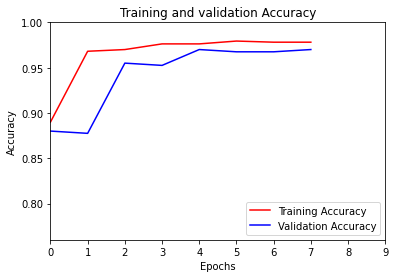

<Figure size 432x288 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
acc=History[0].history['accuracy']
val_acc=History[0].history['val_accuracy']
loss=History[0].history['loss']
val_loss=History[0].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.760,1.00))
plt.xlim([0,9])
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

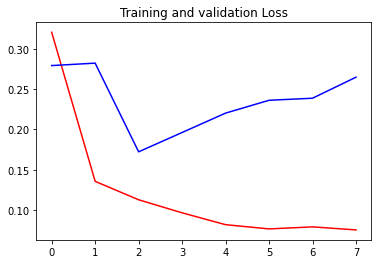

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss")
plt.figure()

<Figure size 432x288 with 0 Axes>

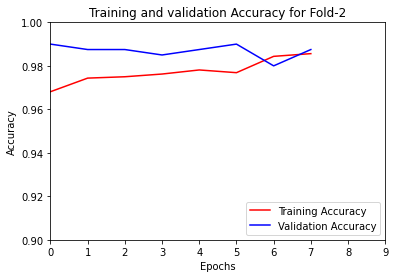

<Figure size 432x288 with 0 Axes>

In [47]:
acc=History[1].history['accuracy']
val_acc=History[1].history['val_accuracy']
loss=History[1].history['loss']
val_loss=History[1].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.90,1.00))
plt.xlim([0,9])
plt.title("Training and validation Accuracy for Fold-2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

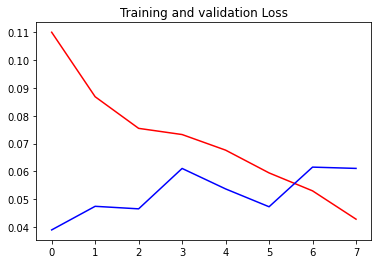

<Figure size 432x288 with 0 Axes>

In [48]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss")
plt.figure()

<Figure size 432x288 with 0 Axes>

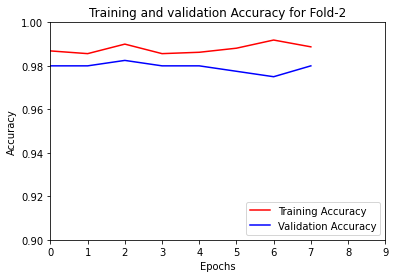

<Figure size 432x288 with 0 Axes>

In [49]:
acc=History[2].history['accuracy']
val_acc=History[2].history['val_accuracy']
loss=History[2].history['loss']
val_loss=History[2].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.90,1.00))
plt.xlim([0,9])
plt.title("Training and validation Accuracy for Fold-2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

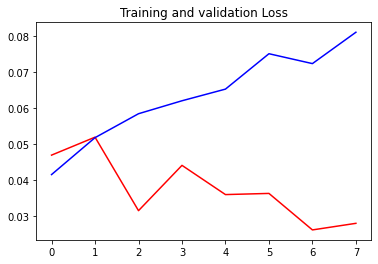

<Figure size 432x288 with 0 Axes>

In [50]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss")
plt.figure()

<Figure size 432x288 with 0 Axes>

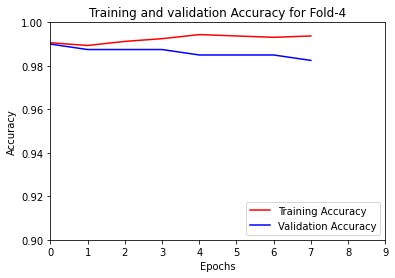

<Figure size 432x288 with 0 Axes>

In [51]:
acc=History[3].history['accuracy']
val_acc=History[3].history['val_accuracy']
loss=History[3].history['loss']
val_loss=History[3].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.90,1.00))
plt.xlim([0,9])
plt.title("Training and validation Accuracy for Fold-4")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

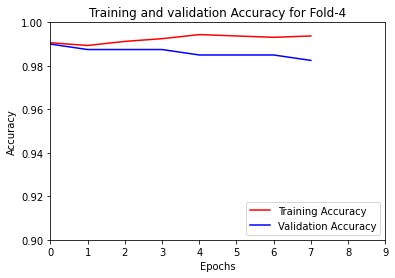

<Figure size 432x288 with 0 Axes>

In [52]:
acc=History[3].history['accuracy']
val_acc=History[3].history['val_accuracy']
loss=History[3].history['loss']
val_loss=History[3].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.90,1.00))
plt.xlim([0,9])
plt.title("Training and validation Accuracy for Fold-4")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

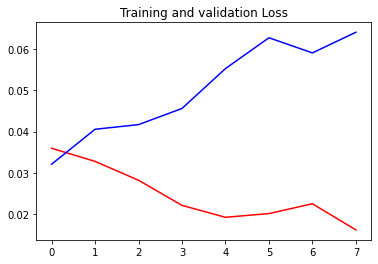

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss")
plt.figure()

<Figure size 432x288 with 0 Axes>

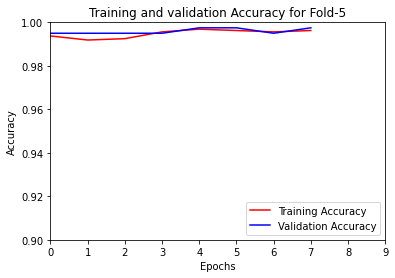

<Figure size 432x288 with 0 Axes>

In [54]:
acc=History[4].history['accuracy']
val_acc=History[4].history['val_accuracy']
loss=History[4].history['loss']
val_loss=History[4].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.90,1.00))
plt.xlim([0,9])
plt.title("Training and validation Accuracy for Fold-5")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

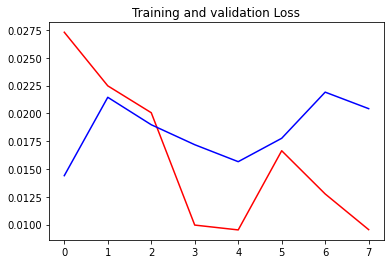

<Figure size 432x288 with 0 Axes>

In [55]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss")
plt.figure()

In [56]:
y_predict=model.predict(X_dataset)
Y_predict=np.argmax(y_predict,axis=1)
Y_predict=np.reshape(Y_predict,(1999,1))
from sklearn.metrics import confusion_matrix
metrics=confusion_matrix(Y_dataset,Y_predict)
print(metrics)


[[1296    4]
 [   0  699]]
